In [3]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt

In [4]:
# Read Dataset
df=pd.read_csv(r'Healthcare.csv')
df

,Name,Age,Gender,Blood Type,Medical Condition,Date of Admission,Doctor,Hospital,Insurance Provider,Billing Amount,Room Number,Admission Type,Discharge Date,Medication,Test Results,Patient Category,Age Group
0,Bobby JacksOn,30,Male,B-,Cancer,2024-01-31,Matthew Smith,Sons and Miller,Blue Cross,18856.281306,328,Urgent,2024-02-02,Paracetamol,Normal,Adult,21-40
1,LesLie TErRy,62,Male,A+,Obesity,2019-08-20,Samantha Davies,Kim Inc,Medicare,33643.327287,265,Emergency,2019-08-26,Ibuprofen,Inconclusive,Adult,61-80
2,DaNnY sMitH,76,Female,A-,Obesity,2022-09-22,Tiffany Mitchell,Cook PLC,Aetna,27955.096079,205,Emergency,2022-10-07,Aspirin,Normal,Senior,61-80
3,andrEw waTtS,28,Female,O+,Diabetes,2020-11-18,Kevin Wells,"Hernandez Rogers and Vang,",Medicare,37909.782410,450,Elective,2020-12-18,Ibuprofen,Abnormal,Adult,21-40
4,adrIENNE bEll,43,Female,AB+,Cancer,2022-09-19,Kathleen Hanna,White-White,Aetna,14238.317814,458,Urgent,2022-10-09,Penicillin,Abnormal,Adult,41-60
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55495,eLIZABeTH jaCkSOn,42,Female,O+,Asthma,2020-08-16,Joshua Jarvis,Jones-Thompson,Blue Cross,2650.714952,417,Elective,2020-09-15,Penicillin,Abnormal,Adult,41-60
55496,KYle pEREz,61,Female,AB-,Obesity,2020-01-23,Taylor Sullivan,Tucker-Moyer,Cigna,31457.797307,316,Elective,2020-02-01,Aspirin,Normal,Adult,61-80
55497,HEATher WaNG,38,Female,B+,Hypertension,2020-07-13,Joe Jacobs DVM,"and Mahoney Johnson Vasquez,",UnitedHealthcare,27620.764717,347,Urgent,2020-08-10,Ibuprofen,Abnormal,Adult,21-40
55498,JENniFER JOneS,43,Male,O-,Arthritis,2019-05-25,Kimberly Curry,"Jackson Todd and Castro,",Medicare,32451.092358,321,Elective,2019-05-31,Ibuprofen,Abnormal,Adult,41-60


In [5]:
# most common medical condition among the patients
most_common_condition = df['Medical Condition'].mode()[0]
print(f"The most common medical condition is: {most_common_condition}")

The most common medical condition is: Arthritis


In [6]:
df.groupby(['Medical Condition','Gender']).size().unstack(fill_value=0)

Gender,Female,Male
Medical Condition,,
Arthritis,4686,4622
Asthma,4553,4632
Cancer,4602,4625
Diabetes,4651,4653
Hypertension,4612,4633
Obesity,4622,4609


In [7]:
# Define age groups
age_groups = pd.cut(df['Age'], bins=[0, 20, 40, 60, 80, 100], labels=['0-20', '21-40', '41-60', '61-80', '81+'])
prevalence_by_age = df.groupby(age_groups)['Medical Condition'].value_counts().unstack(fill_value=0)
print("Prevalence by age group:\n", prevalence_by_age)

Prevalence by age group:
 Medical Condition  Arthritis  Asthma  Cancer  Diabetes  Hypertension  Obesity
Age                                                                          
0-20                     428     408     417       401           386      403
21-40                   2705    2696    2695      2685          2689     2711
41-60                   2781    2654    2727      2799          2743     2802
61-80                   2706    2751    2709      2777          2747     2645
81+                      688     676     679       642           680      670


C:\Users\Rahul\AppData\Local\Temp\ipykernel_12752\352903568.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  prevalence_by_age = df.groupby(age_groups)['Medical Condition'].value_counts().unstack(fill_value=0)


In [8]:
# most common medical condition in  younger patients
younger_patients = df[df['Age'] <= 20]

# Count the frequency of each medical condition in this group
conditions_younger = younger_patients['Medical Condition'].value_counts()
print("Most common medical conditions in younger patients (0-20):\n", conditions_younger)

Most common medical conditions in younger patients (0-20):
 Medical Condition
Arthritis       428
Cancer          417
Asthma          408
Obesity         403
Diabetes        401
Hypertension    386
Name: count, dtype: int64


In [9]:
# Create a pivot table where rows are age and columns are medical conditions, with counts as values
pivot_table = df.pivot_table(index='Age', columns='Medical Condition', aggfunc='size', fill_value=0)

# Compute correlation between age and medical conditions
correlation_age_condition = pivot_table.corr()
print("Correlation between age and medical conditions:\n", correlation_age_condition)

Correlation between age and medical conditions:
 Medical Condition  Arthritis    Asthma    Cancer  Diabetes  Hypertension  \
Medical Condition                                                          
Arthritis           1.000000  0.930983  0.946045  0.924655      0.927599   
Asthma              0.930983  1.000000  0.929901  0.934270      0.932083   
Cancer              0.946045  0.929901  1.000000  0.939238      0.949504   
Diabetes            0.924655  0.934270  0.939238  1.000000      0.929612   
Hypertension        0.927599  0.932083  0.949504  0.929612      1.000000   
Obesity             0.936107  0.945678  0.953337  0.937806      0.946030   

Medical Condition   Obesity  
Medical Condition            
Arthritis          0.936107  
Asthma             0.945678  
Cancer             0.953337  
Diabetes           0.937806  
Hypertension       0.946030  
Obesity            1.000000  


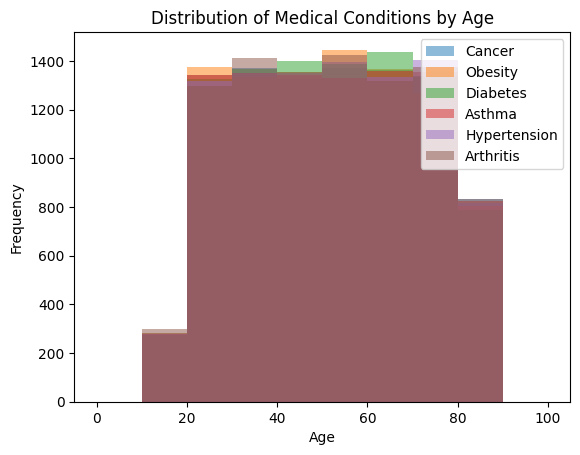

In [10]:
for condition in df['Medical Condition'].unique():
    condition_data = df[df['Medical Condition'] == condition]
    plt.hist(condition_data['Age'], bins=range(0, 101, 10), alpha=0.5, label=condition)

plt.xlabel('Age')
plt.ylabel('Frequency')
plt.legend(loc='upper right')
plt.title('Distribution of Medical Conditions by Age')
plt.show()

In [12]:
# Analyze the Admission Types
admission_type_count = df['Admission Type'].value_counts()

print("\nMost Common Admission Types:")
print(admission_type_count)


Most Common Admission Types:
Admission Type
Elective     18655
Urgent       18576
Emergency    18269
Name: count, dtype: int64


In [13]:
# Analyze the associated medical conditions for each Admission Type
conditions_by_admission_type = df.groupby('Admission Type')['Medical Condition'].value_counts().unstack(fill_value=0)

print("\nAssociated Medical Conditions for Each Admission Type:")
print(conditions_by_admission_type)


Associated Medical Conditions for Each Admission Type:
Medical Condition  Arthritis  Asthma  Cancer  Diabetes  Hypertension  Obesity
Admission Type                                                               
Elective                3083    3102    3148      3058          3221     3043
Emergency               3108    3002    3015      3017          3001     3126
Urgent                  3117    3081    3064      3229          3023     3062


In [14]:
# Medication Analysis
medication_analysis = df.groupby(['Medical Condition', 'Admission Type'])['Medication'].value_counts().unstack(fill_value=0)

print("\nMedication Analysis by Condition and Admission Type:")
print(medication_analysis)


Medication Analysis by Condition and Admission Type:
Medication                        Aspirin  Ibuprofen  Lipitor  Paracetamol  \
Medical Condition Admission Type                                             
Arthritis         Elective            667        572      591          615   
                  Emergency           635        655      586          621   
                  Urgent              616        595      648          641   
Asthma            Elective            631        577      587          664   
                  Emergency           555        620      622          596   
                  Urgent              616        630      614          628   
Cancer            Elective            599        675      605          677   
                  Emergency           606        565      656          564   
                  Urgent              581        633      661          612   
Diabetes          Elective            588        620      640          616   
          

In [15]:
# Distribution Across Different Conditions
billing_by_condition = df.groupby('Medical Condition')['Billing Amount'].describe()
print("Distribution of Billing Amounts by Medical Condition:")
print(billing_by_condition)

Distribution of Billing Amounts by Medical Condition:
                    count          mean           std          min  \
Medical Condition                                                    
Arthritis          9308.0  25497.327056  14276.529904 -1129.997176   
Asthma             9185.0  25635.249359  14241.677464 -1520.420555   
Cancer             9227.0  25161.792707  14200.271700 -2008.492140   
Diabetes           9304.0  25638.405577  14159.524315 -1316.618581   
Hypertension       9245.0  25497.095761  14305.400942 -1660.009373   
Obesity            9231.0  25805.971259  14079.526507 -1310.272895   

                            25%           50%           75%           max  
Medical Condition                                                          
Arthritis          13045.187447  25581.763549  37723.725201  52170.036854  
Asthma             13438.347398  25661.872824  38023.742125  52181.837792  
Cancer             12834.217700  24910.980640  37449.337407  52373.032374  
Diabe

In [16]:
#Outcomes by Doctor
outcomes_by_doctor = df.groupby('Doctor')['Test Results'].value_counts().unstack().fillna(0)
print("Outcomes by Doctor:")
print(outcomes_by_doctor)

Outcomes by Doctor:
Test Results     Abnormal  Inconclusive  Normal
Doctor                                         
Aaron Acevedo         0.0           1.0     0.0
Aaron Adams           0.0           0.0     1.0
Aaron Aguilar         0.0           0.0     1.0
Aaron Alexander       0.0           0.0     1.0
Aaron Anderson        0.0           0.0     1.0
...                   ...           ...     ...
Zoe Khan              0.0           1.0     0.0
Zoe Knight            1.0           0.0     0.0
Zoe Nichols           1.0           0.0     0.0
Zoe Roberts           1.0           0.0     0.0
Zoe Wallace           0.0           0.0     1.0

[40341 rows x 3 columns]


In [17]:
#Success Rate (based on "Normal" test results)
doctor_success_rate = (outcomes_by_doctor['Normal'] / outcomes_by_doctor.sum(axis=1)) * 100

print("\nDoctor Success Rate (Percentage of Normal Test Results):")
print(doctor_success_rate)


Doctor Success Rate (Percentage of Normal Test Results):
Doctor
Aaron Acevedo        0.0
Aaron Adams        100.0
Aaron Aguilar      100.0
Aaron Alexander    100.0
Aaron Anderson     100.0
                   ...  
Zoe Khan             0.0
Zoe Knight           0.0
Zoe Nichols          0.0
Zoe Roberts          0.0
Zoe Wallace        100.0
Length: 40341, dtype: float64


<Figure size 1000x600 with 0 Axes>

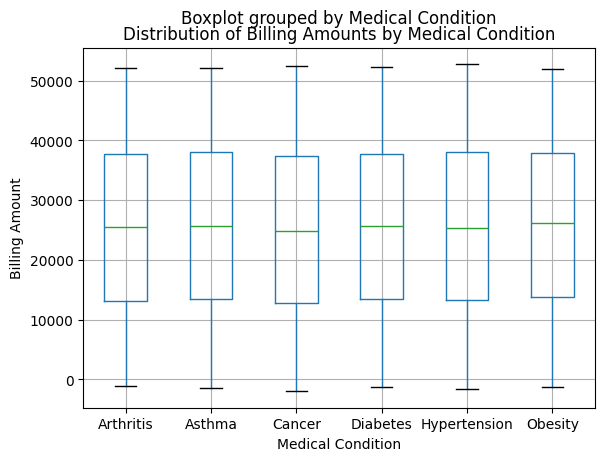

In [20]:
plt.figure(figsize=(10, 6))
df.boxplot(column='Billing Amount', by='Medical Condition')
plt.title('Distribution of Billing Amounts by Medical Condition')
plt.xlabel('Medical Condition')
plt.ylabel('Billing Amount')
plt.show()

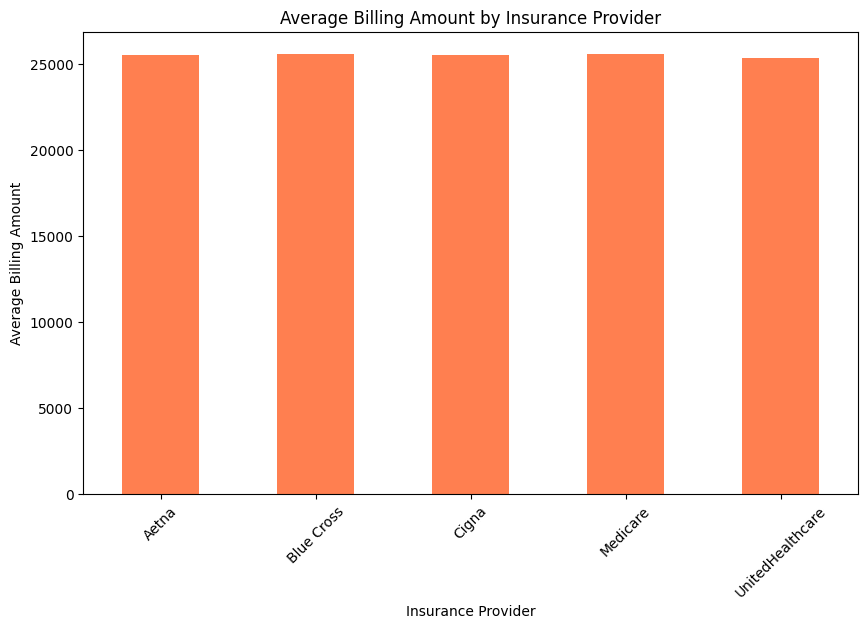

In [21]:
#average billing amount by insurance provider
avg_billing = df.groupby('Insurance Provider')['Billing Amount'].mean()

plt.figure(figsize=(10, 6))
avg_billing.plot(kind='bar', color='coral')
plt.title('Average Billing Amount by Insurance Provider')
plt.xlabel('Insurance Provider')
plt.ylabel('Average Billing Amount')
plt.xticks(rotation=45)
plt.show()


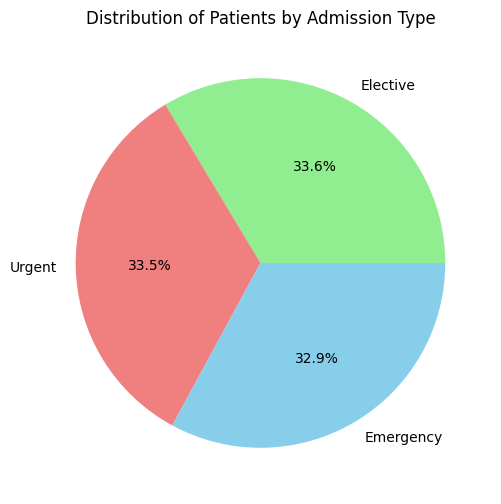

In [25]:
admission_type_counts = df['Admission Type'].value_counts()

# Plot number of patients by admission type
plt.figure(figsize=(10, 6))
admission_type_counts.plot(kind='pie', autopct='%1.1f%%', colors=['lightgreen', 'lightcoral','skyblue'])
plt.title('Distribution of Patients by Admission Type')
plt.ylabel('')
plt.show()